In [90]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

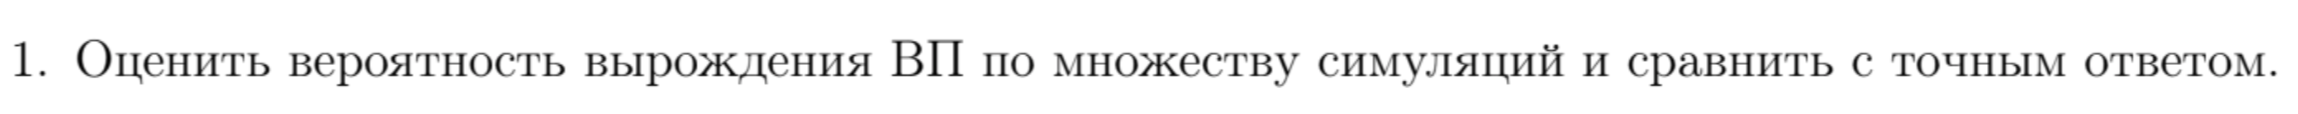

In [270]:
test_results = []
def gen_branching_process(particles, steps, p):
    if steps != 0:
        children = sts.geom.rvs(p, size = particles).sum() - particles
        steps -= 1
        if (children != 0):
            gen_branching_process(children, steps, p)
        else:
            test_results.append(True)
    else:
        test_results.append(False)
        
branch_depth = 10
starting_particles = 1
num_trials = 1000
p = 1/4

for _ in range(num_trials):
    gen_branching_process(starting_particles, branch_depth, p)
proba = sum(test_results)/num_trials
th_proba = 1.0 if p>=1/2 else p/(1-p)
print(f"Практическая вероятность вырождения с P = {p:.3f}: {proba:.3f}")
print(f"Теоретическая вероятность вырождения c P = {p:.3f}: {th_proba:.3f}")

Практическая вероятность вырождения с P = 0.250: 0.320
Теоретическая вероятность вырождения c P = 0.250: 0.333


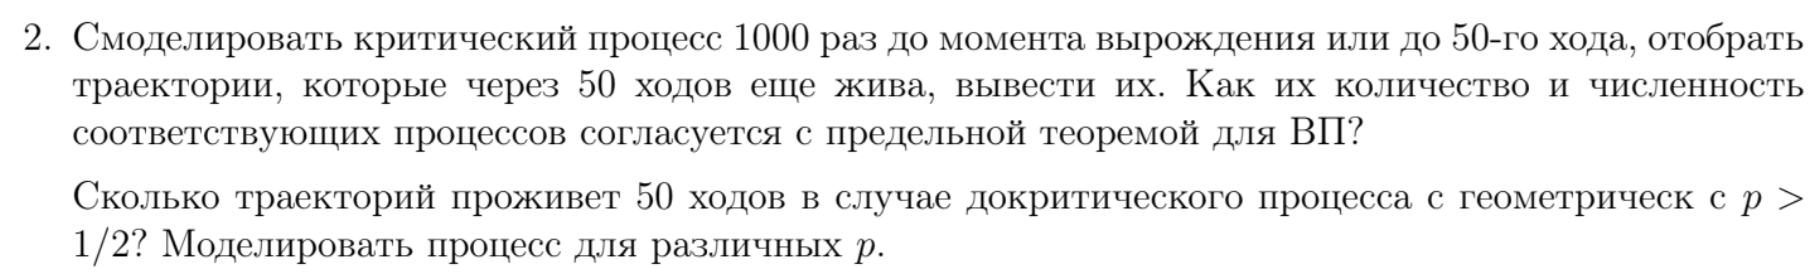

In [91]:
def task2(p, branch_depth, num_trials):
    starting_particles = 1
    history = []
    test_results = []
    
    mean_ = (1-p)/p
    var_ = mean_/p
    def gen_branching_process(particles, steps, p):
        history.append(particles)
        if steps != 0:
            children = sts.geom.rvs(p, size = particles).sum() - particles
            steps -= 1
            if (children != 0):
                gen_branching_process(children, steps, p)
            else:
                test_results.append(True)
        else:
            test_results.append(False)
            history.append(-1)

    living_trajs = []
    for _ in range(num_trials):
        history = []
        gen_branching_process(starting_particles, branch_depth, p)
        if history[-1] == -1:
            living_trajs.append(history[:-1])
    num_alive = num_trials - sum(test_results)
    if mean_ == 1:
        x = 2 
        test_arr = np.array([2*traj[-1]/(branch_depth * var_) for traj in living_trajs])
        res = (test_arr <= x).sum()
        print(f"Testing proba: {res/num_alive}")
        print(f"Theoretical proba: {1- np.e**(-x)}")
    print(f"Количество выживших траекторий: {num_alive}\n")
    for i, traject in enumerate(living_trajs):
        print(f"{i+1}-ая выжившая траектория: {traject} \n")

In [92]:
task2(0.5, 50, 1000)

Testing proba: 1.0
Theoretical proba: 0.8646647167633873
Количество выживших траекторий: 13

1-ая выжившая траектория: [1, 1, 2, 2, 2, 5, 9, 24, 25, 27, 34, 30, 43, 36, 28, 34, 47, 53, 59, 59, 63, 67, 56, 59, 40, 47, 32, 30, 20, 11, 18, 13, 16, 21, 32, 35, 49, 42, 46, 44, 32, 37, 53, 48, 46, 36, 47, 46, 39, 20, 30] 

2-ая выжившая траектория: [1, 4, 11, 11, 10, 18, 19, 22, 11, 8, 3, 6, 2, 3, 7, 8, 9, 12, 8, 16, 5, 7, 12, 14, 12, 6, 7, 13, 17, 24, 12, 8, 9, 9, 5, 5, 6, 8, 3, 4, 8, 3, 2, 3, 4, 10, 6, 11, 15, 7, 5] 

3-ая выжившая траектория: [1, 4, 7, 9, 11, 24, 25, 29, 23, 36, 29, 14, 23, 25, 17, 14, 11, 15, 16, 20, 20, 20, 14, 14, 14, 21, 22, 25, 27, 29, 22, 18, 16, 14, 5, 7, 10, 14, 19, 28, 27, 40, 32, 47, 55, 49, 42, 35, 48, 55, 52] 

4-ая выжившая траектория: [1, 2, 5, 7, 9, 8, 10, 10, 4, 3, 4, 5, 14, 19, 19, 16, 12, 13, 13, 8, 13, 14, 16, 26, 26, 35, 22, 19, 21, 35, 42, 34, 44, 59, 62, 68, 57, 70, 80, 77, 62, 51, 35, 45, 43, 40, 41, 38, 41, 38, 37] 

5-ая выжившая траектория: [1, 3

In [9]:
task2(0.51, 50, 1000)

Количество выживших траекторий: 4

1-ая выжившая траектория: [1, 3, 5, 4, 5, 11, 6, 9, 16, 18, 7, 1, 3, 7, 7, 5, 3, 4, 3, 4, 10, 16, 16, 16, 25, 29, 31, 31, 25, 21, 11, 9, 6, 5, 9, 5, 7, 9, 11, 11, 9, 8, 8, 8, 6, 5, 6, 3, 3, 6, 8] 

2-ая выжившая траектория: [1, 1, 2, 3, 3, 5, 12, 20, 18, 16, 12, 10, 19, 11, 7, 13, 11, 8, 8, 17, 14, 12, 17, 23, 27, 26, 24, 32, 29, 23, 15, 14, 11, 6, 4, 11, 7, 7, 7, 5, 2, 3, 4, 7, 8, 5, 3, 3, 2, 2, 2] 

3-ая выжившая траектория: [1, 2, 5, 8, 11, 10, 14, 4, 6, 2, 8, 4, 10, 10, 14, 7, 13, 21, 24, 30, 35, 36, 48, 36, 34, 40, 59, 47, 43, 48, 45, 23, 26, 16, 13, 16, 15, 8, 17, 27, 24, 37, 32, 23, 21, 22, 19, 14, 14, 12, 7] 

4-ая выжившая траектория: [1, 1, 3, 5, 6, 6, 5, 5, 3, 2, 3, 5, 13, 22, 13, 22, 21, 21, 26, 31, 19, 12, 11, 12, 6, 6, 5, 7, 9, 9, 5, 6, 3, 5, 4, 8, 9, 24, 31, 31, 55, 48, 36, 44, 43, 40, 21, 15, 15, 15, 4] 



In [10]:
task2(0.52, 50, 1000)

Количество выживших траекторий: 3

1-ая выжившая траектория: [1, 2, 1, 6, 10, 7, 7, 5, 8, 12, 10, 9, 2, 4, 3, 3, 4, 2, 2, 2, 2, 2, 1, 3, 2, 8, 6, 9, 17, 18, 28, 24, 11, 19, 13, 5, 5, 8, 4, 1, 3, 3, 4, 5, 3, 3, 5, 7, 10, 7, 15] 

2-ая выжившая траектория: [1, 3, 9, 12, 16, 12, 16, 13, 19, 17, 8, 8, 4, 6, 9, 18, 27, 20, 22, 21, 21, 20, 18, 25, 24, 23, 17, 18, 19, 20, 18, 20, 24, 26, 20, 24, 32, 36, 34, 17, 15, 11, 14, 10, 5, 9, 8, 8, 5, 1, 3] 

3-ая выжившая траектория: [1, 3, 2, 4, 3, 5, 3, 1, 3, 6, 7, 11, 18, 15, 21, 25, 33, 31, 34, 34, 26, 23, 28, 36, 27, 27, 17, 14, 10, 13, 21, 33, 33, 43, 34, 39, 44, 52, 52, 46, 43, 36, 44, 33, 21, 23, 19, 17, 12, 9, 6] 



In [21]:
task2(0.53, 50, 1000)

Количество выживших траекторий: 0



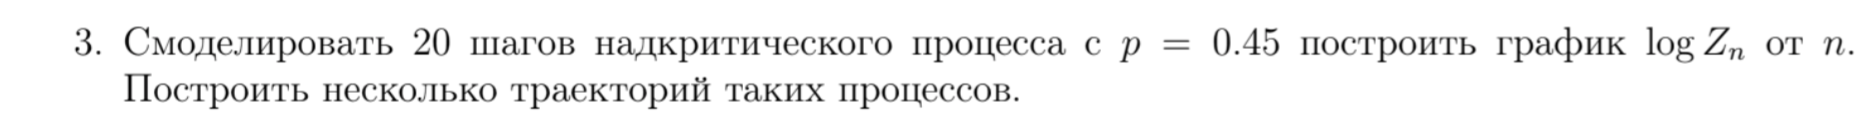

Количество выживших траекторий: 35

1-ая выжившая траектория: [1, 7, 8, 15, 21, 23, 27, 40, 62, 83, 106, 116, 138, 144, 171, 231, 239, 329, 407, 542, 674] 

2-ая выжившая траектория: [1, 3, 3, 5, 6, 2, 5, 6, 13, 21, 41, 40, 47, 55, 65, 98, 113, 155, 172, 189, 228] 

3-ая выжившая траектория: [1, 2, 4, 9, 7, 11, 8, 11, 16, 21, 17, 18, 32, 46, 69, 116, 174, 283, 376, 486, 587] 

4-ая выжившая траектория: [1, 1, 3, 12, 18, 31, 40, 52, 100, 120, 158, 193, 271, 372, 400, 490, 658, 746, 880, 1067, 1365] 

5-ая выжившая траектория: [1, 1, 3, 8, 5, 10, 3, 3, 5, 10, 14, 12, 24, 29, 39, 60, 90, 130, 162, 213, 239] 

6-ая выжившая траектория: [1, 1, 1, 1, 1, 5, 10, 13, 9, 6, 10, 15, 7, 10, 12, 8, 6, 12, 9, 10, 12] 

7-ая выжившая траектория: [1, 4, 8, 8, 8, 5, 2, 8, 9, 4, 5, 7, 10, 9, 7, 14, 11, 20, 24, 17, 12] 

8-ая выжившая траектория: [1, 3, 7, 9, 11, 15, 22, 57, 63, 95, 123, 132, 193, 265, 300, 382, 460, 636, 801, 970, 1225] 

9-ая выжившая траектория: [1, 3, 1, 1, 4, 8, 11, 9, 9, 8, 5, 5, 1

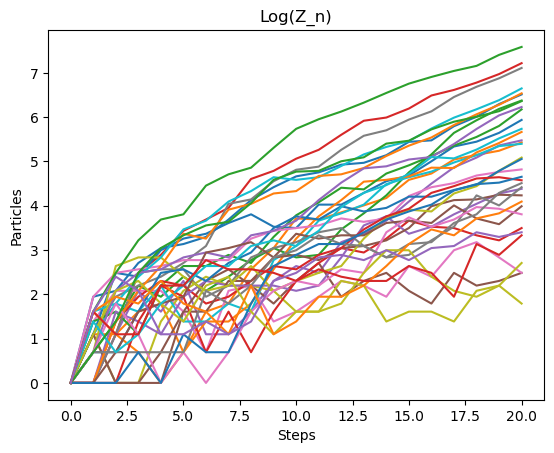

In [23]:
def task3(p, branch_depth, num_trials):
    starting_particles = 1
    history = []
    test_results = []
    def gen_branching_process(particles, steps, p):
        history.append(particles)
        if steps != 0:
            children = sts.geom.rvs(p, size = particles).sum() - particles
            steps -= 1
            if (children != 0):
                gen_branching_process(children, steps, p)
            else:
                test_results.append(True)
        else:
            test_results.append(False)
            history.append(-1)
 
    living_trajs = []
    for _ in range(num_trials):
        history = []
        gen_branching_process(starting_particles, branch_depth, p)
        if history[-1] == -1:
            living_trajs.append(history[:-1])
    num_alive = num_trials - sum(test_results)
    print(f"Количество выживших траекторий: {num_alive}\n")
    fig, ax = plt.subplots()
    for i, traject in enumerate(living_trajs):
        print(f"{i+1}-ая выжившая траектория: {traject} \n")
        ax.plot(np.arange(21), np.log(traject))
    plt.title("Log(Z_n)")
    plt.xlabel("Steps")
    plt.ylabel("Particles")
task3(0.45, 20, 200)

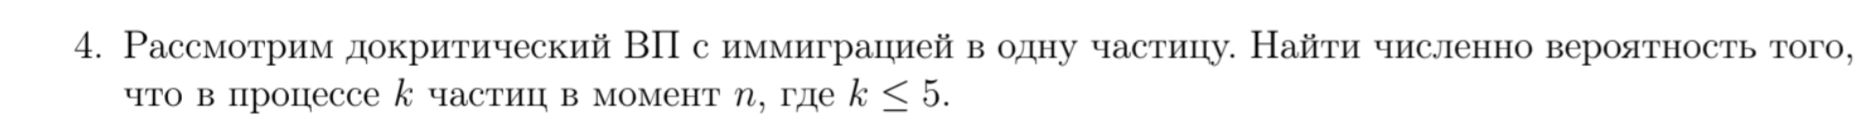

In [24]:
p = 0.55 # докритический это м.о. < 1. То есть p > 1/2
starting_particles = 1
history = []
test_results = []

def gen_branching_process(particles, steps, p):
    history.append(particles)
    if steps != 0:
        children = sts.geom.rvs(p, size = particles).sum()
        steps -= 1
        gen_branching_process(children, steps, p)
        
k_range = [1,2,3,4,5]
n_range = np.arange(1,11)
num_samp = 200
for n in n_range:
    print(f"Testing for N = {n}")
    for k in k_range:
        results = []
        for _ in range(num_samp):
            history = []
            gen_branching_process(starting_particles, n, p)
            results.append(history[-1] == k)
        print(f"Resulting proba for k = {k}: {sum(results)/num_samp}")
    print()

Testing for N = 1
Resulting proba for k = 1: 0.545
Resulting proba for k = 2: 0.29
Resulting proba for k = 3: 0.095
Resulting proba for k = 4: 0.035
Resulting proba for k = 5: 0.04

Testing for N = 2
Resulting proba for k = 1: 0.26
Resulting proba for k = 2: 0.23
Resulting proba for k = 3: 0.18
Resulting proba for k = 4: 0.08
Resulting proba for k = 5: 0.1

Testing for N = 3
Resulting proba for k = 1: 0.14
Resulting proba for k = 2: 0.16
Resulting proba for k = 3: 0.165
Resulting proba for k = 4: 0.11
Resulting proba for k = 5: 0.06

Testing for N = 4
Resulting proba for k = 1: 0.125
Resulting proba for k = 2: 0.115
Resulting proba for k = 3: 0.085
Resulting proba for k = 4: 0.095
Resulting proba for k = 5: 0.05

Testing for N = 5
Resulting proba for k = 1: 0.075
Resulting proba for k = 2: 0.03
Resulting proba for k = 3: 0.07
Resulting proba for k = 4: 0.045
Resulting proba for k = 5: 0.05

Testing for N = 6
Resulting proba for k = 1: 0.025
Resulting proba for k = 2: 0.035
Resulting pr

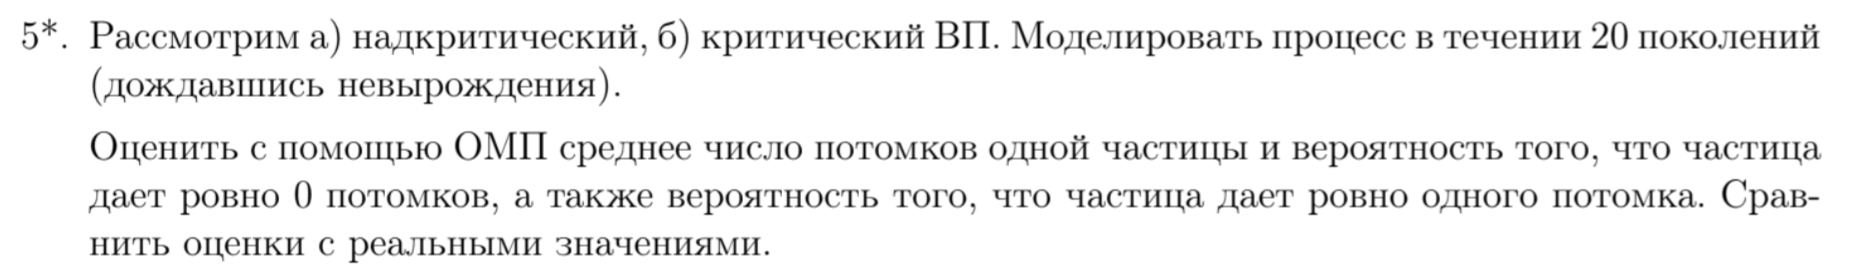

In [958]:
task2(0.52, 20, 100) # моделирование надкритического

Количество выживших траекторий: 3

1-ая выжившая траектория: [1, 2, 5, 8, 4, 5, 3, 3, 2, 2, 3, 3, 2, 2, 4, 8, 7, 8, 4, 3, 5] 

2-ая выжившая траектория: [1, 2, 1, 2, 3, 1, 3, 5, 9, 14, 14, 12, 10, 11, 4, 5, 2, 7, 10, 4, 4] 

3-ая выжившая траектория: [1, 1, 1, 2, 4, 3, 9, 13, 14, 14, 8, 12, 14, 16, 12, 6, 7, 4, 5, 5, 17] 



In [959]:
task2(0.5, 20, 100) # моделирование критического

Testing proba: 0.8
Theoretical proba: 0.8646647167633873
Количество выживших траекторий: 5

1-ая выжившая траектория: [1, 1, 1, 2, 6, 12, 15, 24, 14, 6, 8, 12, 19, 29, 38, 35, 55, 80, 82, 89, 109] 

2-ая выжившая траектория: [1, 1, 2, 1, 4, 19, 18, 22, 15, 22, 20, 31, 29, 24, 35, 42, 31, 34, 34, 30, 37] 

3-ая выжившая траектория: [1, 3, 6, 9, 10, 6, 8, 8, 3, 3, 5, 11, 12, 12, 9, 3, 2, 4, 1, 3, 11] 

4-ая выжившая траектория: [1, 3, 7, 7, 12, 19, 25, 26, 20, 24, 24, 12, 10, 9, 15, 6, 10, 6, 8, 11, 19] 

5-ая выжившая траектория: [1, 2, 1, 5, 8, 18, 16, 17, 15, 13, 15, 10, 9, 10, 10, 19, 23, 33, 30, 36, 24] 



In [26]:
#### надкритический, т.е. p < 1/2
def task5(p, branch_depth):
    starting_particles = 1
    history = []
    results_1 = []
    results_0 = []
    def gen_branching_process(particles, steps, p):
        history.append(particles)
        if steps != 0:
            if particles != 0:
                children = sts.geom.rvs(p, size = particles) - np.ones(particles)
                save_res_1 = np.count_nonzero(children == 1)
                save_res_0 = np.count_nonzero(children == 0)
                results_1.append(save_res_1)
                results_0.append(save_res_0)
                children = int(children.sum())
                steps -= 1
                gen_branching_process(children, steps, p)
            else:
                steps -= 1
                gen_branching_process(particles, steps, p)
    gen_branching_process(starting_particles, branch_depth, p)
    print(f"Trajectory: {history}")
    mu_mle = sum(history[1:])/sum(history[:-1])
    print(f"MLE for mean number of children for 1 particle: {mu_mle}")
    proba_0 = sum(results_0)/sum(history[:-1])
    proba_1 = sum(results_1)/sum(history[:-1])
    print(f"Probability of 1 particle giving 1 children is: {proba_1}")
    print(f"Probability of 1 particle giving 0 children is: {proba_0}")
task5(0.45, 20)

Trajectory: [1, 3, 1, 4, 14, 19, 18, 18, 33, 28, 27, 30, 38, 59, 96, 112, 141, 155, 173, 215, 257]
MLE for mean number of children for 1 particle: 1.2160337552742615
Probability of 1 particle giving 1 children is: 0.24641350210970464
Probability of 1 particle giving 0 children is: 0.45654008438818566


In [89]:
# критический, p = 1/2
task5(0.5, 20)

Trajectory: [1, 3, 3, 6, 17, 10, 5, 8, 7, 8, 8, 21, 15, 15, 15, 22, 34, 33, 38, 31, 33]
MLE for mean number of children for 1 particle: 1.1066666666666667
Probability of 1 particle giving 1 children is: 0.2833333333333333
Probability of 1 particle giving 0 children is: 0.44333333333333336
